# Medical Data Visualizer

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

### Data Adjustments

In [157]:
med = pd.read_csv('medical_examination.csv')

med['overweight'] = (med['weight'])/((med['height']/100)**2)
med['overweight'] = np.where(med['overweight']>25, 1, 0)

""" The below did not work because for some reason python did not assign
int values to overweight and thereby ignoring the column when using correlation

"""
# mask = med['bmi'] > 25
# med['overweight'] = mask
# med = med.drop('bmi', axis=1)
#convert falses into 0s and trues into 1s
# med.loc[(med['overweight']==False), 'overweight'] = int(0)
# med.loc[(med['overweight']==True),'overweight'] = int(1)
#another way to do the above is to change the 'mask' list before

activities = list(med.columns[7:13])
print(activities)
for i in activities[:2]:
    med.loc[(med[i]==1), i] = 0
    med.loc[(med[i]>1), i] = 1
    
med.head()


['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0


### Bar Graph

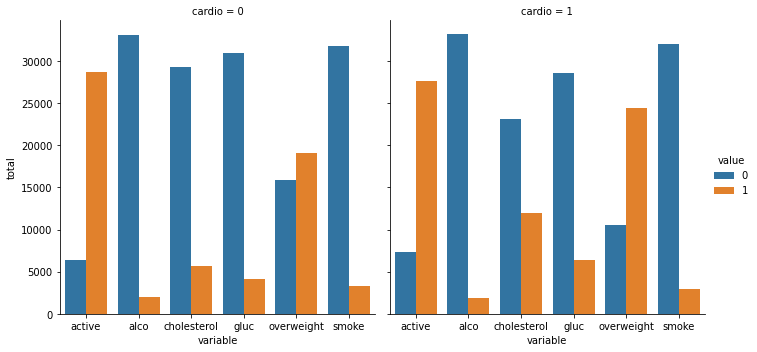

In [151]:
adj_act = list(med.columns[7:12]) + ['overweight']

cat = med.melt(id_vars='cardio', value_vars=adj_act)
cat['total'] = 1
cat = cat.groupby(['cardio', 'variable', 'value'], as_index=False).count()

sns.catplot(x='variable', y='total', hue='value', kind='bar', data=cat, col='cardio')

plt.show()


### Heat Map

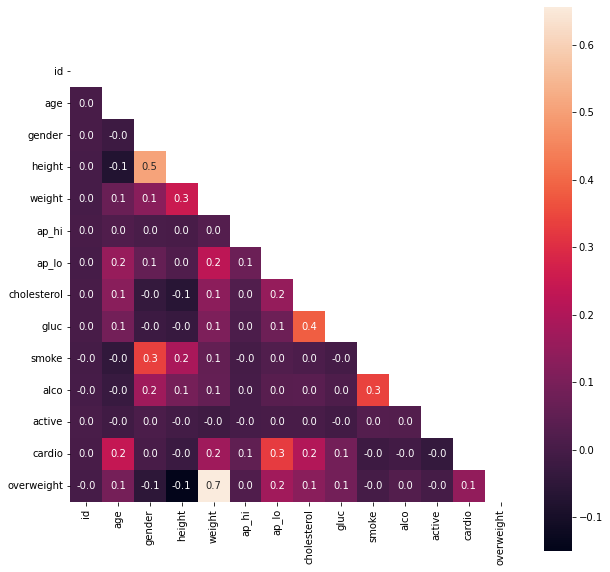

In [160]:
# filter the data

df_heat = med[
    (med['ap_lo'] <= med['ap_hi']) & 
    (med['height'] >= med['height'].quantile(0.025)) &
    (med['height'] <= med['height'].quantile(0.975)) &
    (med.weight >= med.weight.quantile(0.025)) &
    (med.weight <= med.weight.quantile(0.975))
             
             ]

corr = df_heat.corr()
mask = np.triu(corr)

fig, ax = plt.subplots(figsize=(10,10))

sns.heatmap(corr, annot=True, mask=mask, square=True, fmt='.1f')
plt.show()

